## Notebook Import and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

from sympy import symbols, diff

from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Excample 1 - A simple cost funkction
## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

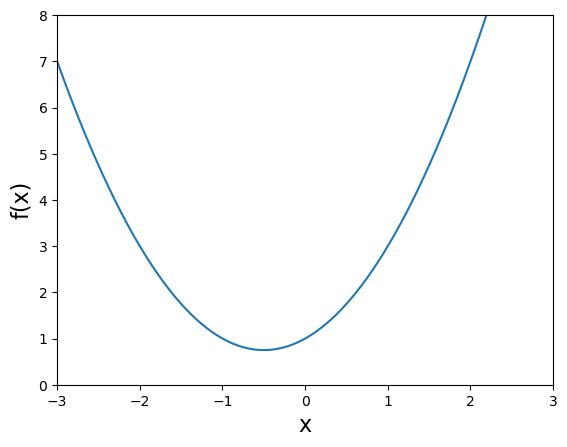

In [4]:
# Plot
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel("x", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

In [5]:
def df(x):
    return 2 * x + 1

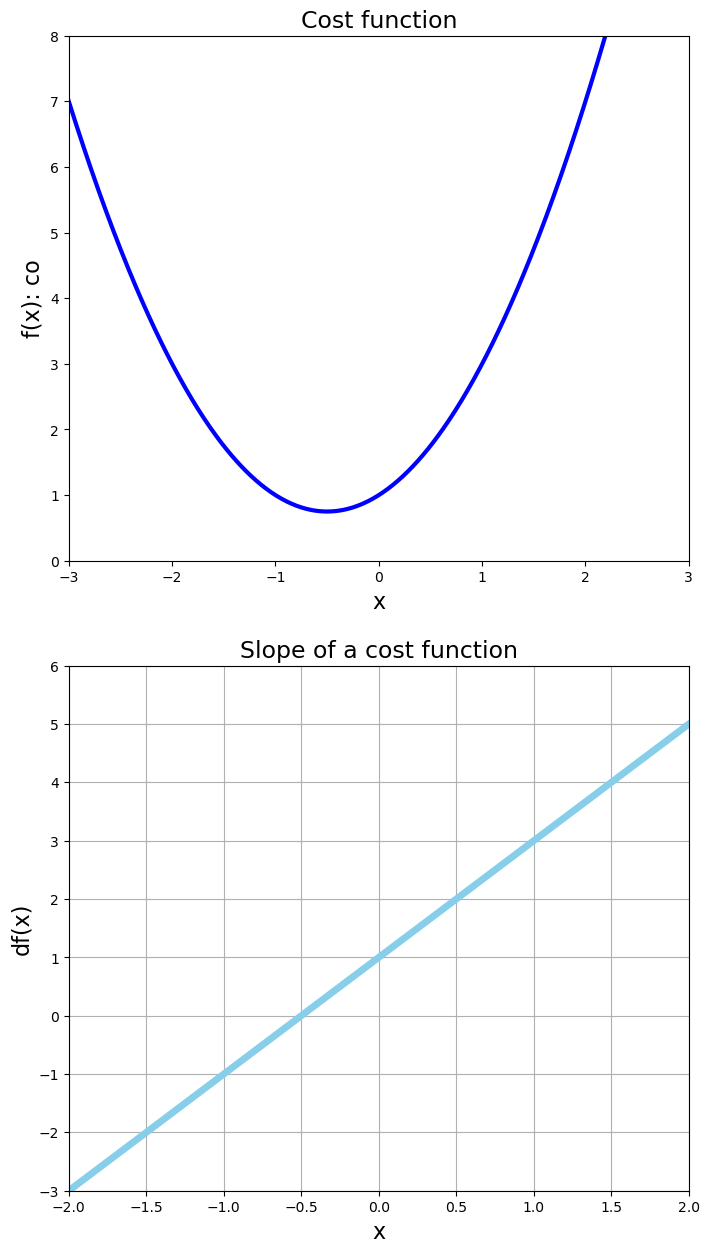

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[8, 15])

# 1 Chart: Cost function
plt.subplot(2, 1, 1)

plt.xlim([-3, 3])
plt.ylim(0,8)

plt.title("Cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("f(x): co", fontsize=16)

plt.plot(x_1, f(x_1), color="blue", linewidth=3)

# 2 Chart: Derivative
plt.subplot(2, 1, 2)

plt.xlim(-2, 2)
plt.ylim(-3, 6)
plt.grid()

plt.title("Slope of a cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("df(x)", fontsize=16)

plt.plot(x_1, df(x_1), color="skyblue", linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [7]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
#     print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print(n)
        break
    
print(new_x)
print(df(new_x))
print(f(new_x))
    

40
-0.49962781616118024
0.0007443676776395236
0.7500001385208099


# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions
## $$g(x) = x^4 - 4x^2+5$$

In [8]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

In [9]:
def g(x):
    return x**4 - 4 * x**2 + 5

In [10]:
def dg(x):
    return 4 * x**3 - 8 * x

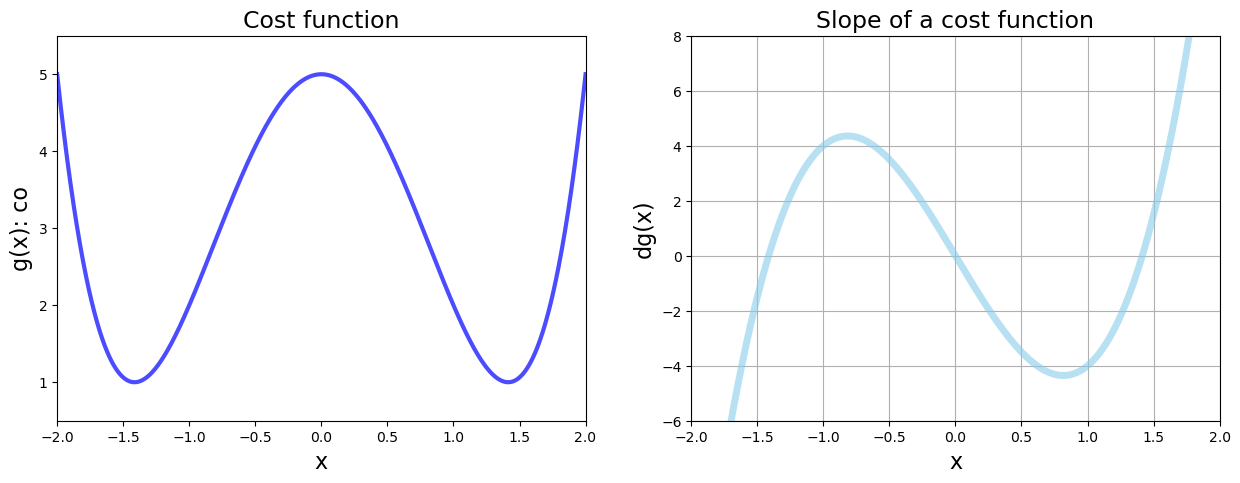

In [11]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("g(x): co", fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=.7)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()

plt.title("Slope of a cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=.6)

plt.show()

## Gradient descent as a Python Function

In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-.5, multiplier=0.01, precision=0.0001)
print(local_min)
print(len(list_x))

-1.4137636556157256
56


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-.1)
print(local_min)
print(len(list_x))

-1.4120887490901561
34


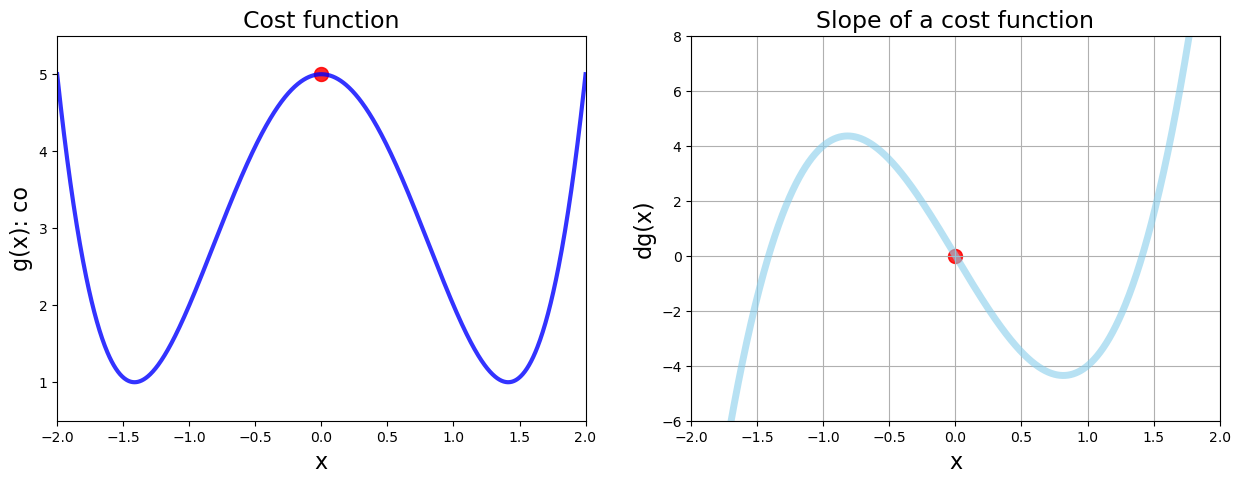

In [15]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("g(x): co", fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=.8)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()

plt.title("Slope of a cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=.6)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=.6)

plt.show()

# Example 3 - Divergence, Overflow, and Python Tumples
## $$h(x) = x^5 - 2 x^4 + 2$$

In [16]:
#Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2 * x**4 + 2

def dh(x):
    return 5*x**4 - 8 * x**3

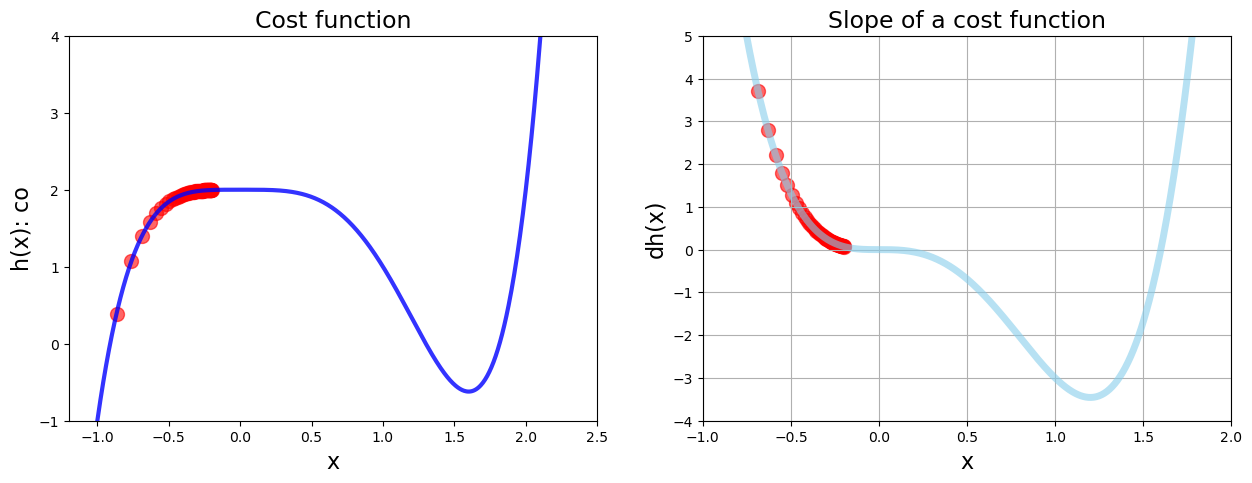

local min occurs at:  -2071072.4470816324
Cost at min is:  -3.810455326061589e+31
Number of steps:  71


In [17]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-1.2, 2.5])
plt.ylim(-1, 4)

plt.title("Cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("h(x): co", fontsize=16)

plt.plot(x_3, h(x_3), color="blue", linewidth=3, alpha=.8)
plt.scatter(list_x, h(np.array(list_x)), color="red", s=100, alpha=.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.grid()

plt.title("Slope of a cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)

plt.plot(x_3, dh(x_3), color="skyblue", linewidth=5, alpha=.6)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=.6)

plt.show()

print("local min occurs at: ", local_min)
print("Cost at min is: ", h(local_min))
print("Number of steps: ", len(list_x))

In [18]:
import sys
# help(sys)
# sys.version
sys.float_info.max

1.7976931348623157e+308

# The learning rate

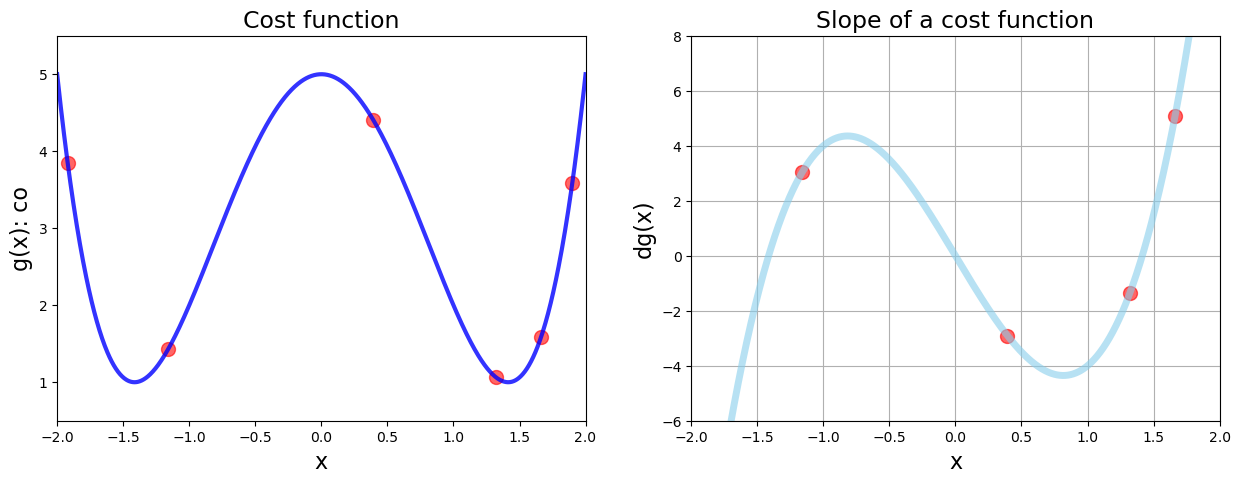

In [19]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, max_iter=5)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("g(x): co", fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=.8)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()

plt.title("Slope of a cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=.6)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=.6)

plt.show()

In [1]:
#Run gradient descent 3 times
n = 100

# Calling gradient descent function
low_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.0005, precision=0.0001,
                                                 max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.001, precision=0.0001,
                                                 max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.002, precision=0.0001,
                                                 max_iter=n)

#Experiment

insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.025, precision=0.0001,
                                                 max_iter=n)
# Plotting reduction in cost for each iteration

plt.figure(figsize=[20, 10])

plt.subplot(1, 2, 1)

plt.xlim([0, n])
plt.ylim(0, 50)

plt.title("Effect of the learning rate", fontsize=17)
plt.xlabel("Nr of iterations", fontsize=16)
plt.ylabel("Cost", fontsize=16)

#Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n + 1
iteration_list = list(range(0, n + 1))


plt.plot(iteration_list, g(low_values), color="lightgreen", linewidth=5)
plt.scatter(iteration_list, g(low_values), color="lightgreen", s=80)

plt.plot(iteration_list, g(np.array(mid_gamma[1])), color="steelblue", linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color="steelblue", s=80)

plt.plot(iteration_list, g(np.array(high_gamma[1])), color="hotpink", linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color="hotpink", s=80)

plt.plot(iteration_list, g(np.array(insane_gamma[1])), color="red", linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color="red", s=80)

plt.show()

# Example 4 - Data Viz with 3D Charts
## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

In [23]:
def f(x, y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [24]:
# Made our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4, y_4 = np.meshgrid(x_4, y_4)
y_4.shape

(200, 200)

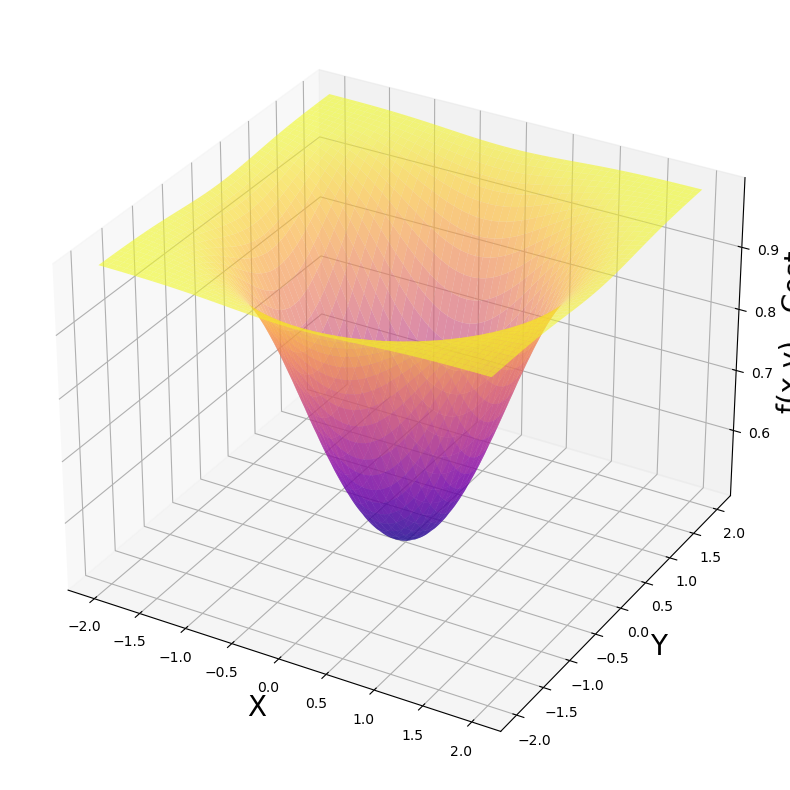

In [25]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 10])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.plasma, alpha=0.6)

plt.show()

## Partial Derivatives & Symbolic Computation
## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2-y^2}+1 \right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2-y^2}+1 \right)^2}$$

In [26]:
a, b = symbols('x, y')
print("Cost function is: ", f(a, b))
print("Partial derivative wrt x is: ", diff(f(a, b), a))
f(a, b).evalf(subs={a:1.8, b:1.0})

Cost function is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


0.990604794032582

In [27]:
diff(f(a, b), a).evalf(subs={a:1.8, b:1.0})

0.0368089716197505

In [28]:
diff(f(a, b), b).evalf(subs={a:1.8, b:1.0})

0.0204494286776392

## Batch Gradient Descent with SymPy

In [29]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [30]:
#Partial derivative functions example 4
def fpx(x, y):
    return 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

def fpy(x, y):
    return 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2

In [31]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [32]:
# Setup
multiplier = .5
max_iter = 50
params = np.array([-1.9, 0]) #initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
#     values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [-2.19740022e-06  0.00000000e+00]
Minimum occurs at x value of:  -2.9016196448443733e-06
Minimum occurs at y value of:  0.0
The cost is:  0.5000000000023124


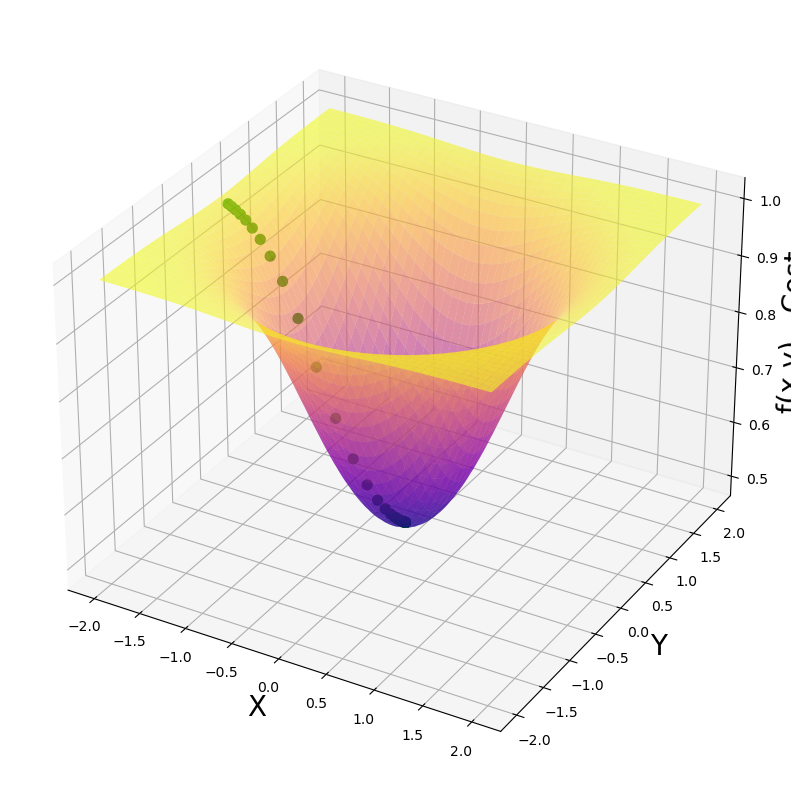

In [33]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 10])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.plasma, alpha=0.6)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color="green", alpha=1)

plt.show()

In [34]:
# Advanced Nympy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Q', 'drums']])
print(hs_band.shape)

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)
print("Nicknames:", the_roots[:, 0]) #Wybranie wszystkich z zerowej kolumny

the_roots = np.append(arr=the_roots, values=[['Malik b', 'MC']], axis=0)
print('Printing band rolse ....', the_roots[:, 1])

(1, 2)
(2, 2)
[['Black Thought' 'MC']
 ['Q' 'drums']
 ['Captain' 'Guitar']]
Nicknames: ['Black Thought' 'Q' 'Captain']
Printing band rolse .... ['MC' 'drums' 'Guitar' 'MC']


# Example 5 - working with Data & a Real Cost Function
## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big(y - \hat{y} \big)^2$$

In [35]:
# Make sample data
x_5 = np.array([[.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array: ', x_5.shape)
print('Shape ofy_5 array: ', y_5.shape)

Shape of x_5 array:  (7, 1)
Shape ofy_5 array:  (7, 1)


In [36]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


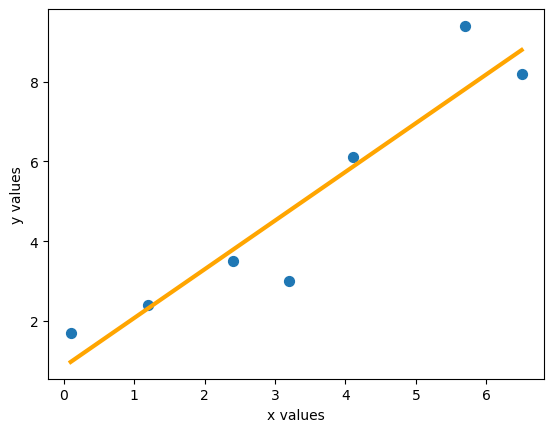

In [37]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [38]:
# y_hat = theta0 + theta1 * x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
print("Estimated values y_hat are: \n", y_hat)
print("In comparison, the actual t values are: \n", y_5)

Estimated values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual t values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [39]:
def mse(y, y_hat):
    sum_1 = 0
    for i in range(y.size):
        sum_1 += (y[i] - y_hat[i])**2
    return sum_1/len(y)

In [40]:
print("Manually calculated MSE is:", mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.9479655759794577


## 3D Plot for the MSE Cost Function
### Make data for thetas

In [41]:
nr_thetas = 200
th_0 = np.linspace(-1, 3, nr_thetas)
th_1 = np.linspace(-1, 3, nr_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

## Calc MSE using nested for loops

In [42]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
#         print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
plot_cost.shape

(200, 200)

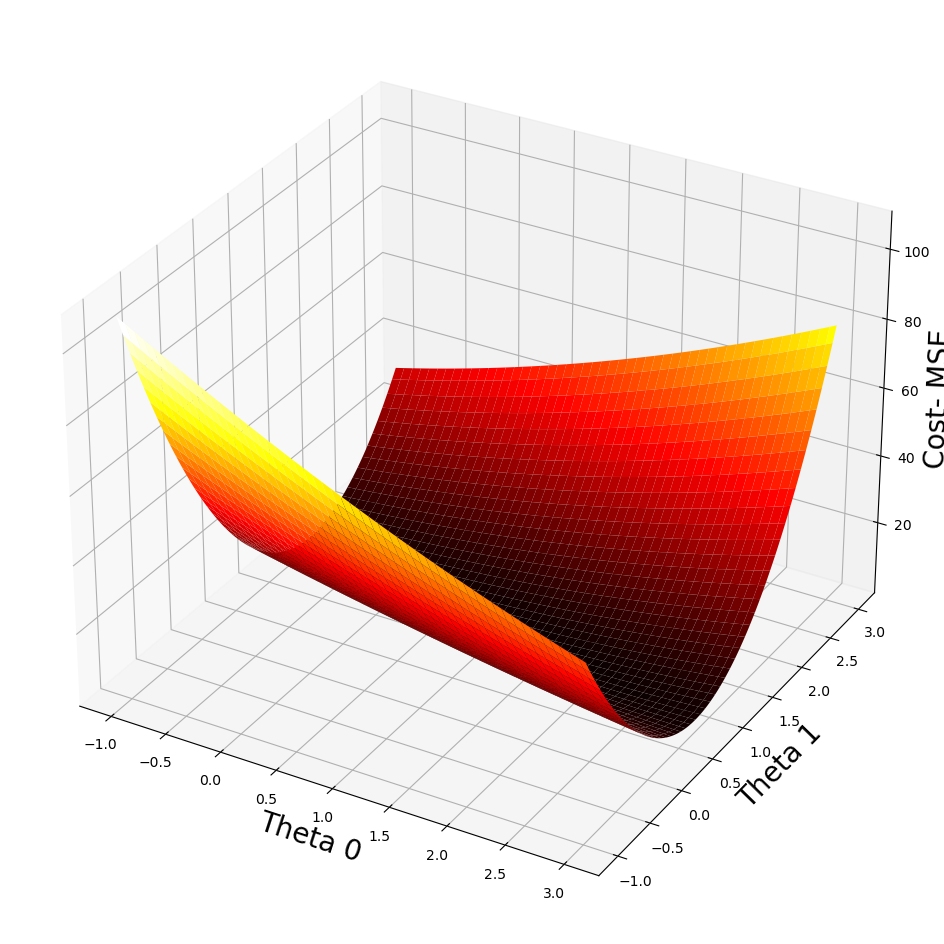

In [43]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost- MSE", fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

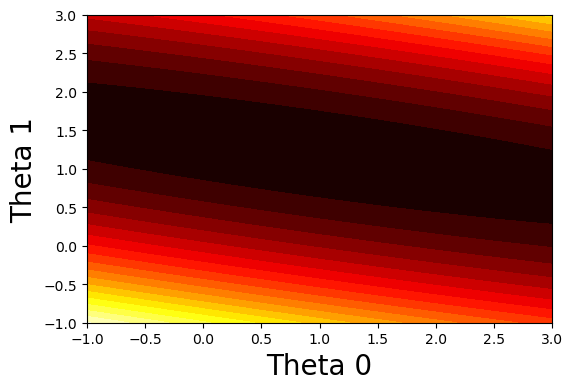

In [44]:
# Plotting MSE 2d Map
fig = plt.figure(figsize=[6,4])

plt.xlabel("Theta 0", fontsize=20)
plt.ylabel("Theta 1", fontsize=20)

# ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.contourf(plot_t0, plot_t1, plot_cost, levels=20, cmap=cm.hot)
plt.show()

In [45]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at(i,j):', ij_min)
print(f'Min MSE for Theta 0 at plot_t0[{ij_min[0]}][{ij_min[1]}]', plot_t0[ij_min[0]][ij_min[1]])
print(f'Min MSE for Theta 1 at plot_t1[{ij_min[0]}][{ij_min[1]}]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at(i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)
\big(x^{(i)}\big)$$

## MSE & Gradient Descent

In [46]:
# x values, y values, array of theta parameters( theta 0 ....)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = -2 / n * sum(y - thetas[0] - thetas[1] * x)
    theta1_slope = -2 / n * sum((y - thetas[0] - thetas[1] * x) * x)
    
    return np.array([theta0_slope[0], theta1_slope[0]])

In [89]:
multiplier = .05
thetas = np.array([0.8464338972439593, 1.2229651752576984])

#Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(100):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    #Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1] * x_5))
    
print("Min occurs at Theta 0: ", thetas[0])
print("Min occurs at Theta 1: ", thetas[1])
print("MSE is:", mse(y_5, thetas[0] + thetas[1] * x_5))

Min occurs at Theta 0:  0.8474718431977132
Min occurs at Theta 1:  1.2227401861063658
MSE is: [0.94796558]


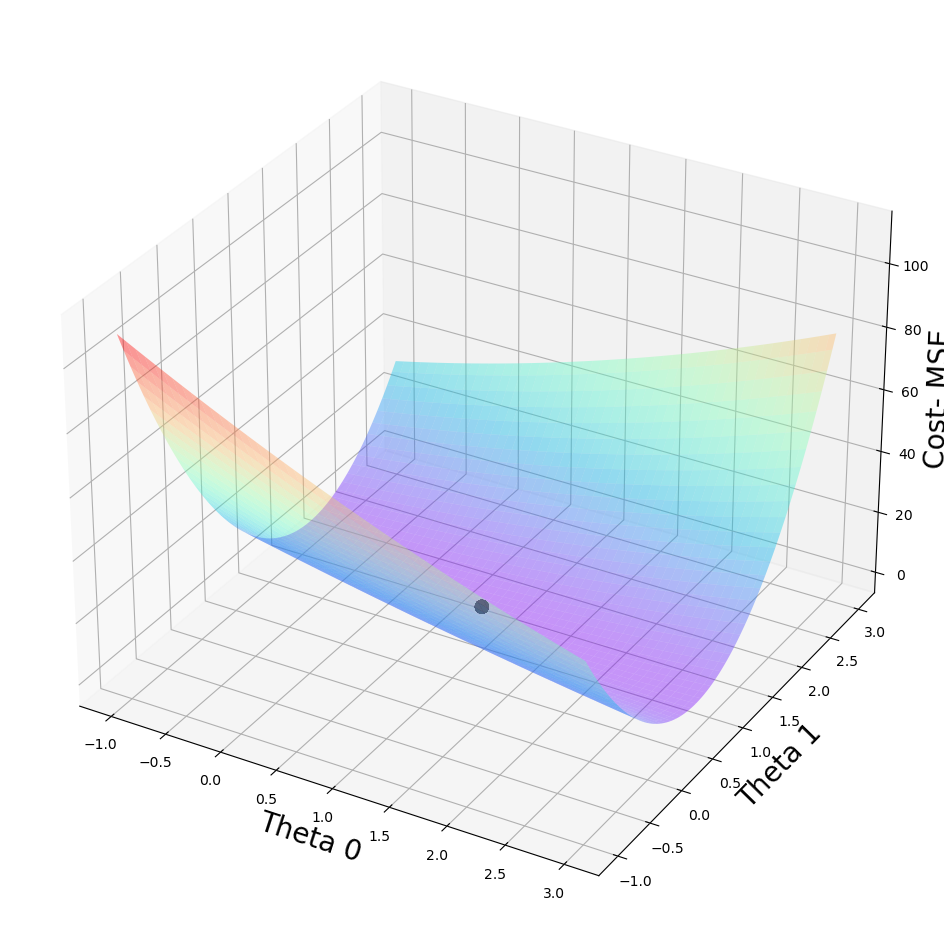

In [90]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost- MSE", fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color="black")
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=.4)
plt.show()